# Credit Card Fraud Detection

Case Study: [**Reference**](https://github.com/krishnaik06/Credit-Card-Fraudlent)

**Problem Statement**: The objective of this project is to develop a credit card fraud detection system using the dataset from Kaggle. The dataset contains a large number of credit card transactions, with both fraudulent and non-fraudulent cases. The goal is to build a machine learning model that can accurately identify fraudulent transactions to help financial institutions mitigate the risk and minimize losses due to fraudulent activities.

In [1]:
from warnings import filterwarnings 
filterwarnings('ignore')

import numpy as np 
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

# Dataset

[**Kaggle Dataset**](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) accounts for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependent cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


In [2]:
data = pd.read_csv('data\creditcard.csv', sep=",")
# data.index = pd.to_datetime(data.index)

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Exploratory Data Analysis

Analyzing the dataset to gain insights into the distribution of fraudulent and non-fraudulent transactions, identifying any class imbalance issues, and understanding the features' characteristics. Cleaning the dataset, handling missing values, scaling numerical features, and encoding categorical variables as necessary. Selecting relevant features and creating new informative features that can potentially improve the model's performance in detecting fraudulent transactions.

In [5]:
data.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

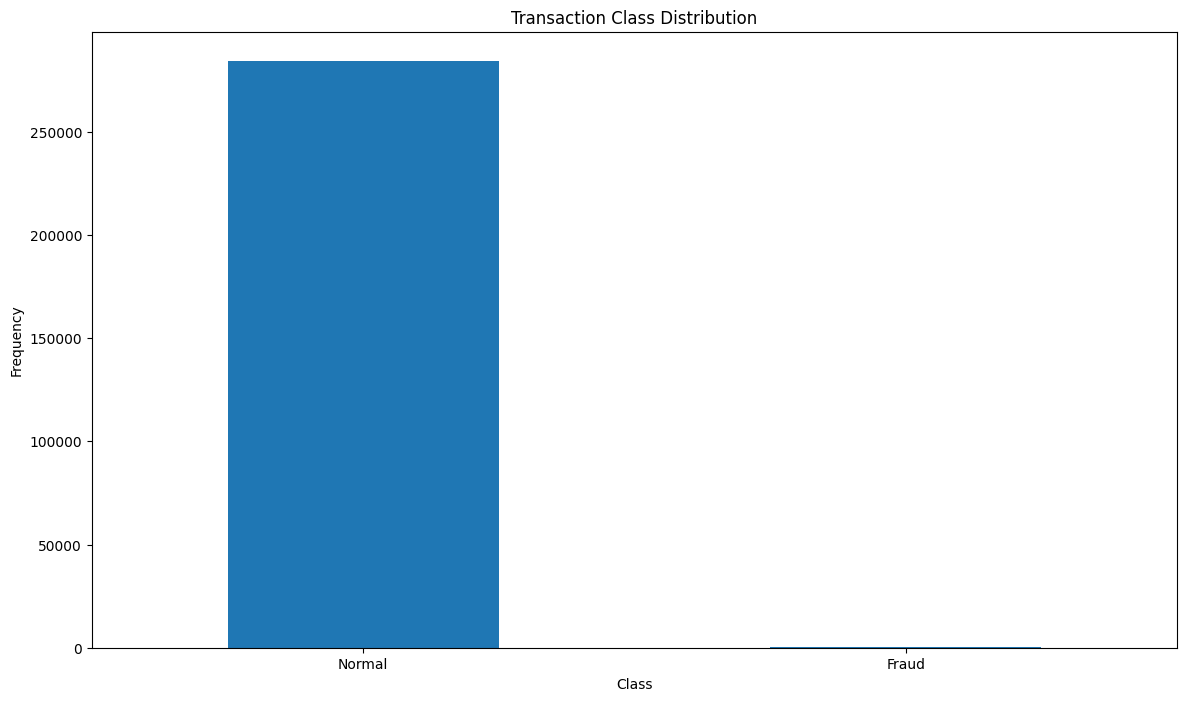

In [6]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [7]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [8]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [10]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

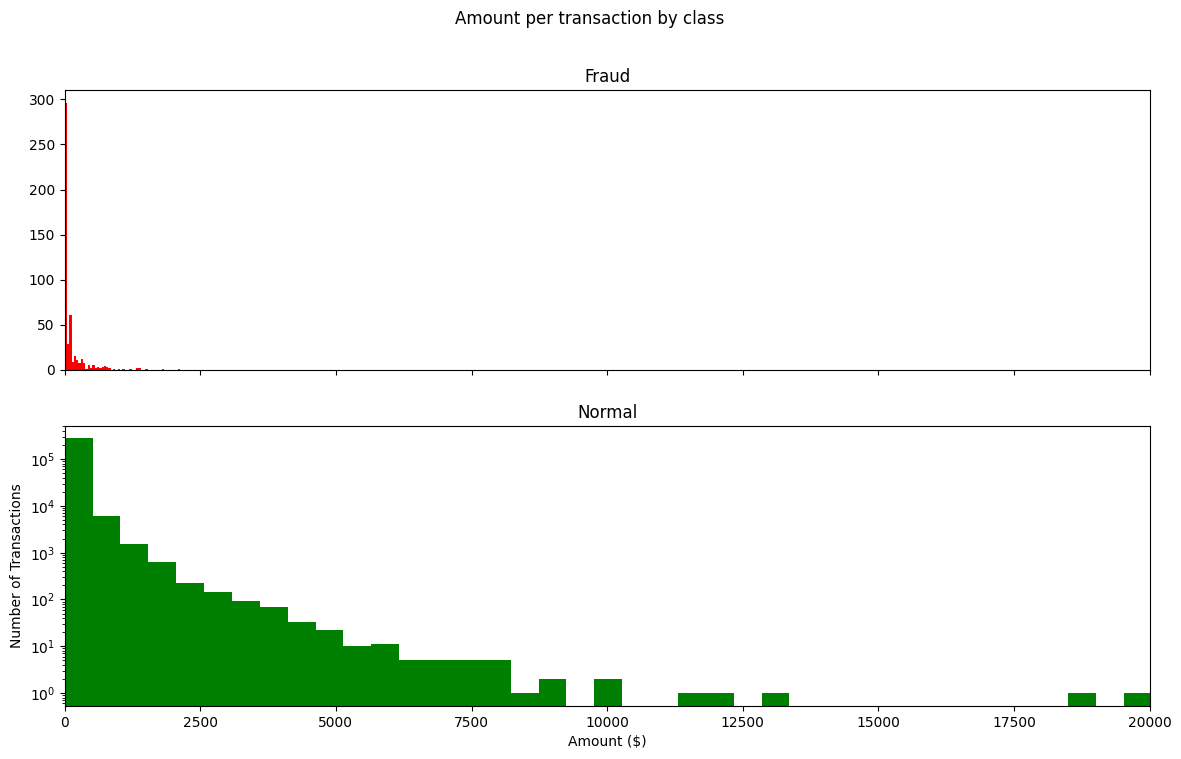

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins, color='red')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='green')
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

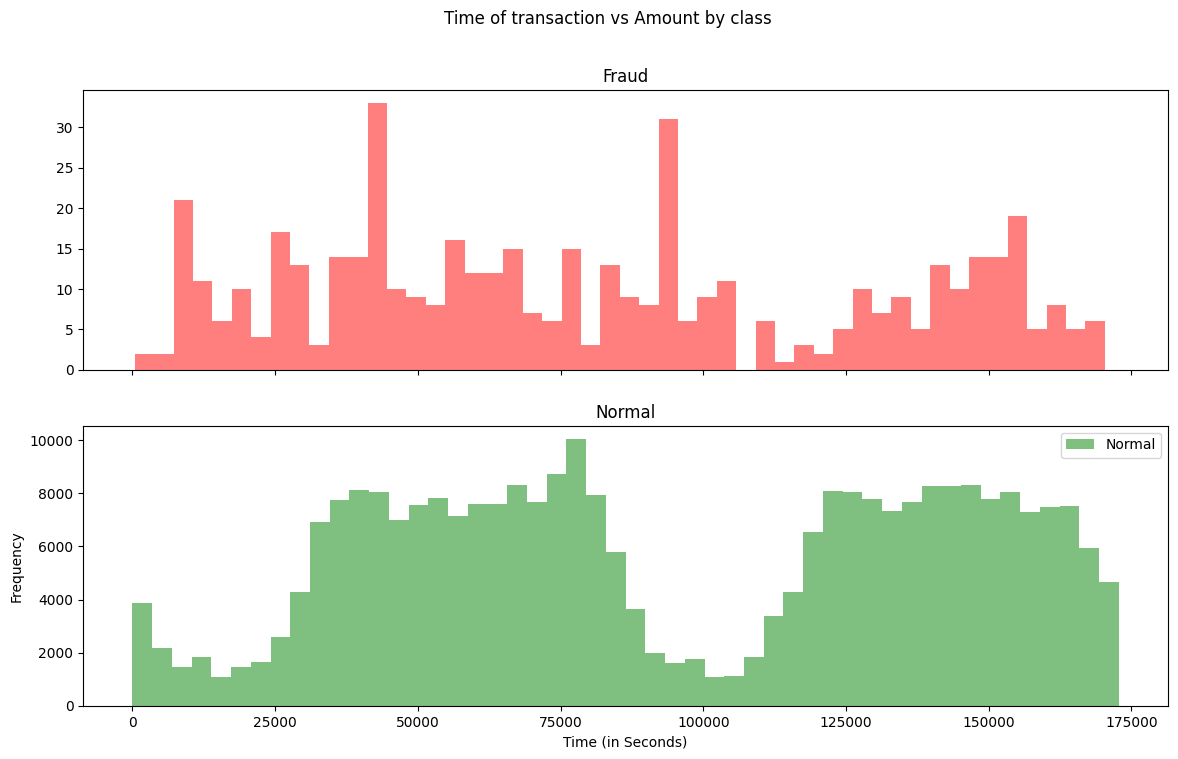

In [12]:
# Create subplots
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

# Plot Fraud transactions as red histograms
ax1.hist(fraud.Time, bins=50, color='red', alpha=0.5, label='Fraud')
ax1.set_title('Fraud')

# Plot Normal transactions as green histograms
ax2.hist(normal.Time, bins=50, color='green', alpha=0.5, label='Normal')
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [13]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [14]:
data.shape

(284807, 31)

In [15]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [16]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


# Correlation

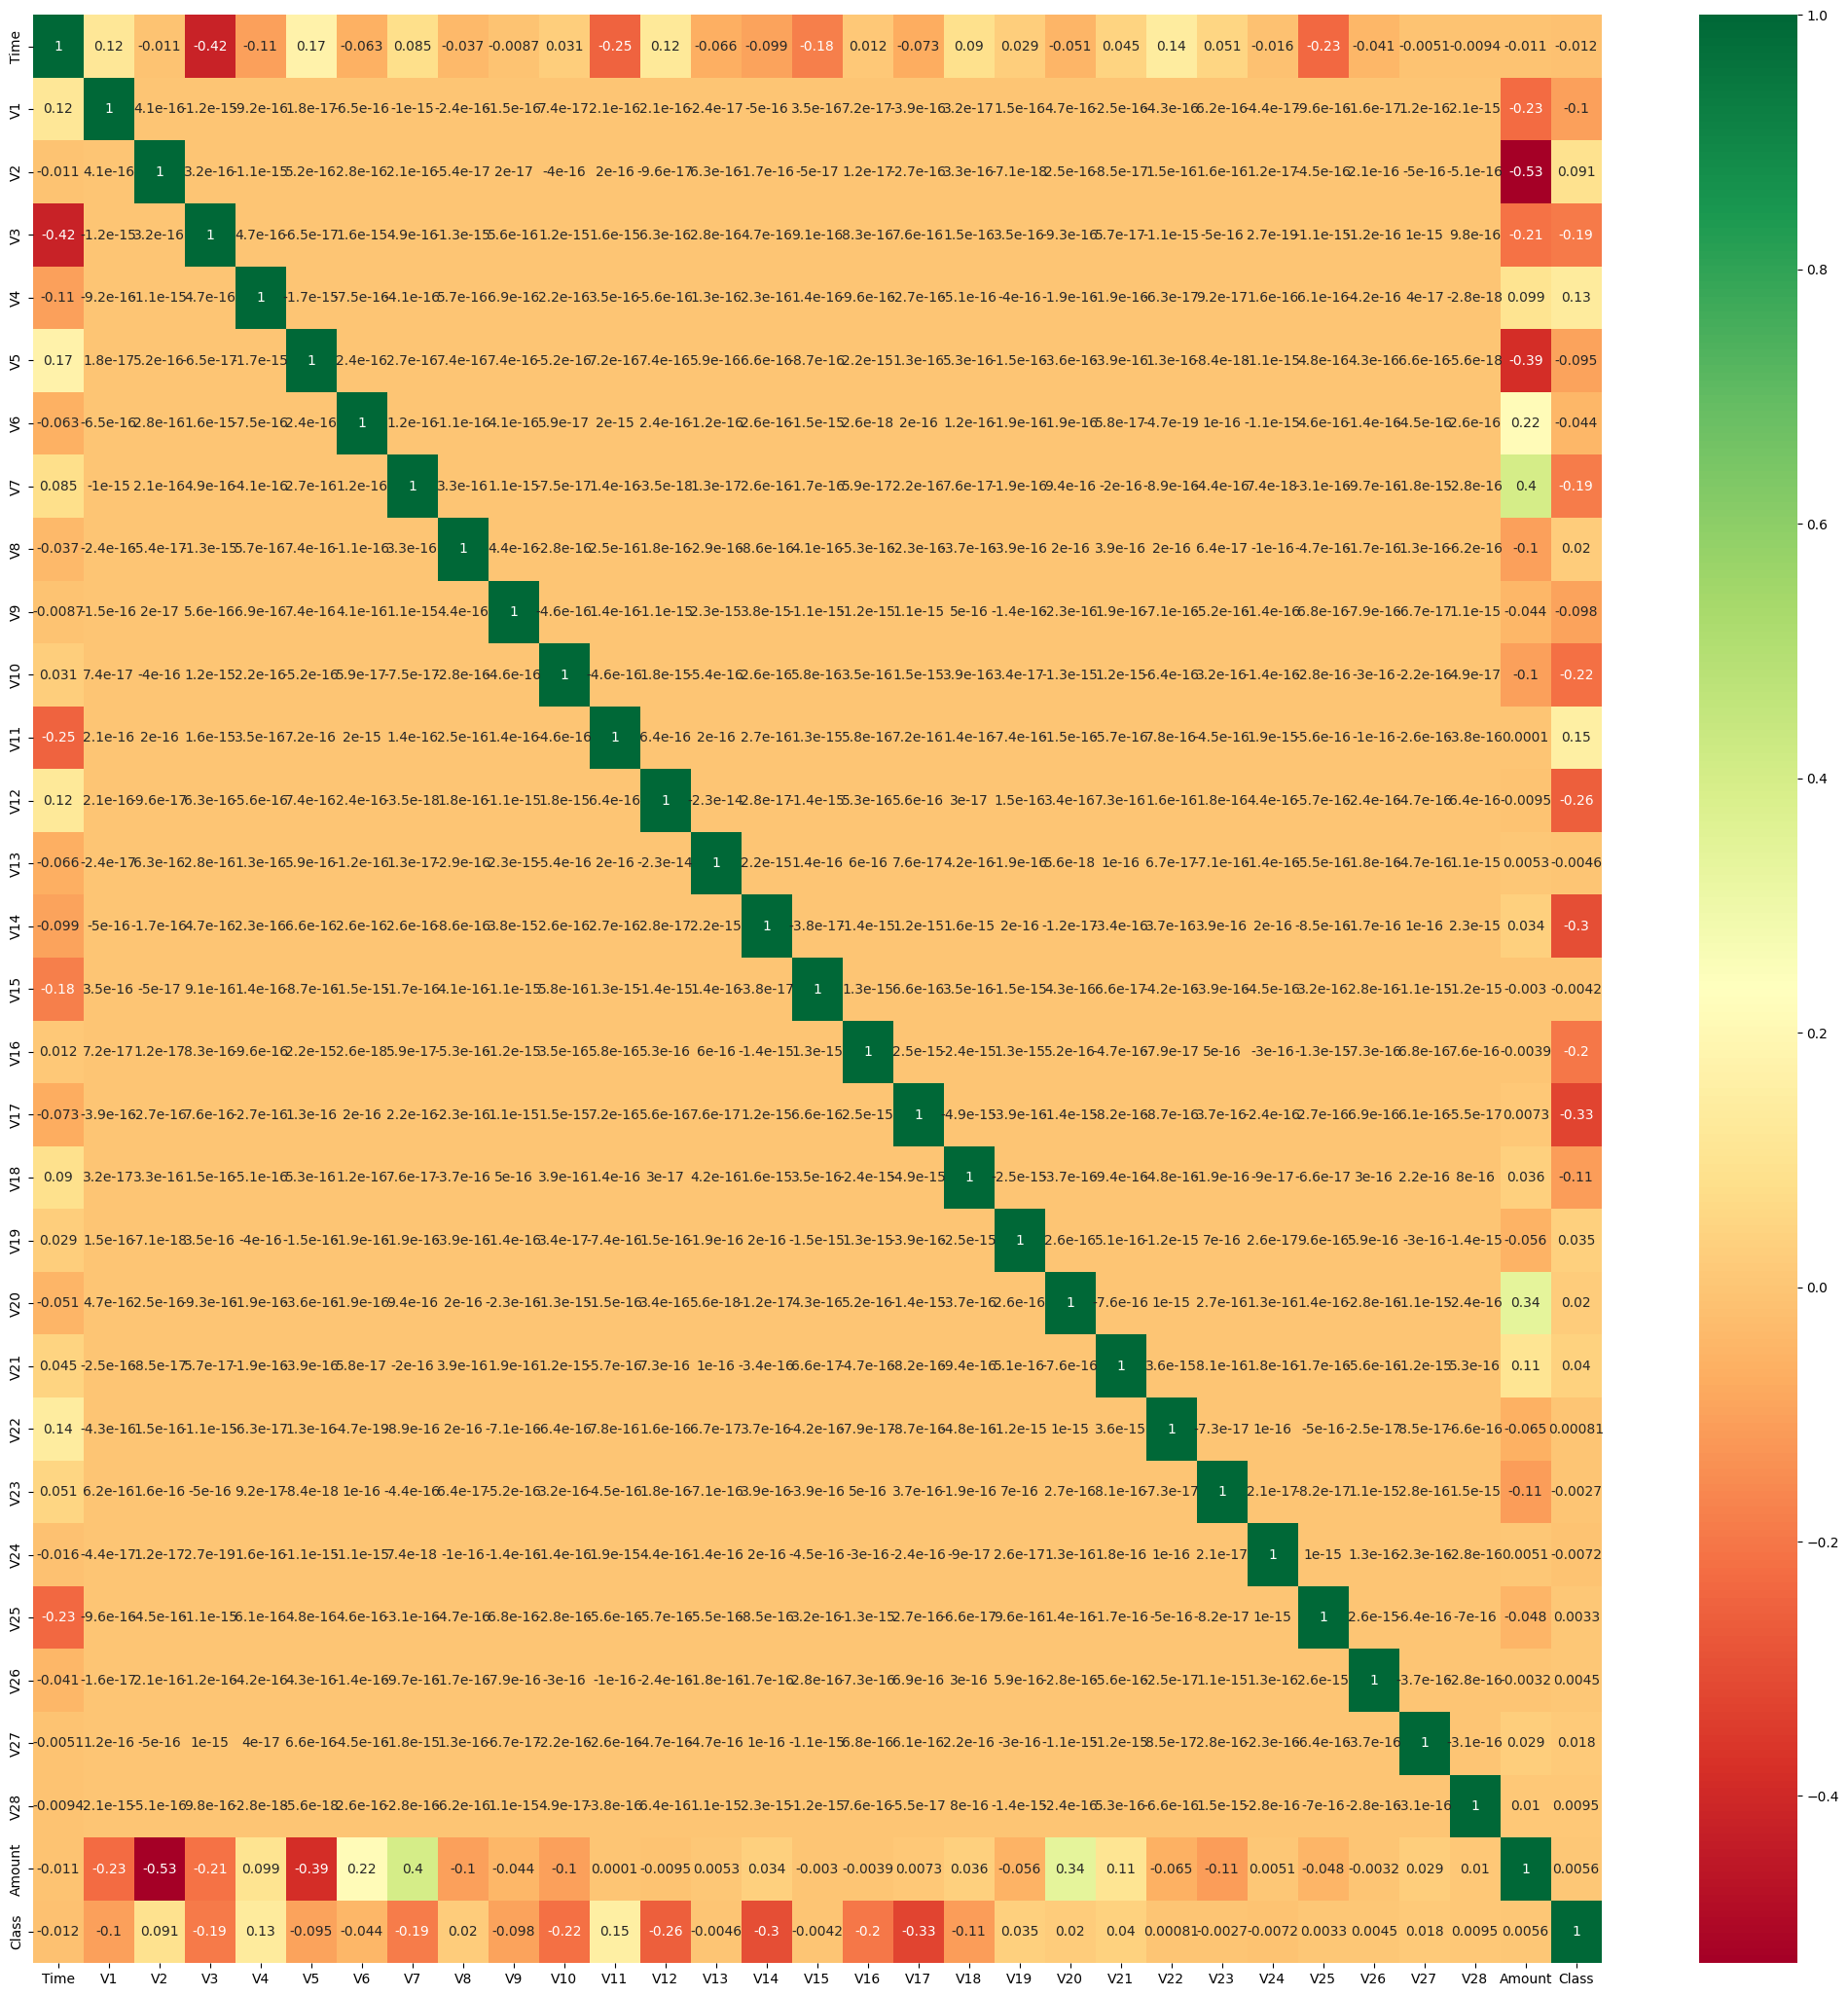

In [17]:
#get correlations of each features in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(26,26))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
#Create independent and Dependent Features
columns = data1.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we are predicting 
target = "Class"

# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

# Print the shapes of X & Y
print(X.shape, Y.shape)

(28481, 30) (28481,)


# Model & Analysis

## Isolation Forest
 
Isolation Forest is an unsupervised machine-learning algorithm used for outlier detection. It leverages the concept of isolating anomalies to detect outliers in a dataset. It builds an ensemble of isolation trees, which are binary trees that randomly partition the data points. Anomalies are expected to have shorter average path lengths in the trees, making them easier to isolate. By assigning anomaly scores based on the average path lengths, the algorithm identifies outliers as data points with low scores. Isolation Forest is particularly effective in high-dimensional datasets and does not rely on assumptions about the data distribution.

## Local Outlier Factor

LOF (Local Outlier Factor) is an unsupervised anomaly detection algorithm that assesses the local density deviation of a data point compared to its neighbors. It quantifies the degree of abnormality of a data point based on its relative density.
 
The LOF algorithm works by calculating a local reachability density for each data point, which represents how isolated or tightly grouped the point is compared to its neighbors. Anomaly scores are assigned based on the degree to which a point's density deviates from the density of its neighbors. Points with significantly lower density compared to their neighbors are considered outliers with higher LOF scores.

LOF is effective in identifying anomalies in datasets with varying densities or clusters of different sizes. It can handle data with complex structures and does not rely on strict assumptions about the data distribution. LOF provides a local perspective on anomalies, allowing for more fine-grained anomaly detection in the dataset.

## One Class Support Vector Machine
 
SVM (Support Vector Machine) is a supervised machine learning algorithm used for classification and regression tasks. It finds an optimal hyperplane that separates data points into different classes or predicts continuous values. SVM aims to maximize the margin between classes, making it robust to outliers. It can handle linearly separable data and can also utilize kernels to handle non-linearly separable data by mapping it to a higher-dimensional feature space. SVM is effective in high-dimensional spaces, but it can be computationally expensive for large datasets due to its quadratic time complexity.

In [19]:
classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
}

# Accuracy

In [20]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8516
Accuracy Score :
0.7009936448860644
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   

# Conclusion

- **Isolation Forest Outperforms Others:** Isolation Forest detected fewer errors (73) compared to Local Outlier Factor (97) and Support Vector Machine (8516), showcasing its superiority in anomaly detection.

- **High Accuracy of Isolation Forest:** Isolation Forest achieved an accuracy of 99.74%, outperforming both Local Outlier Factor (99.65%) and Support Vector Machine (70.09%).

- **Better Precision and Recall with Isolation Forest:** Isolation Forest exhibited superior precision and recall for fraud cases (27%) compared to Local Outlier Factor (2%) and Support Vector Machine (0%), indicating its effectiveness in identifying fraud instances.

- **Overall Performance of Isolation Forest:** The Isolation Forest method performed exceptionally well in detecting fraud cases, achieving an overall detection rate of around 30%.

- **Potential Improvements:** To enhance classifier performance, consider increasing the sample size or exploring deep learning algorithms. Additionally, complex anomaly detection models may be employed for improved accuracy, acknowledging the associated computational costs.